<a href="https://colab.research.google.com/github/Anarki1983/ML/blob/master/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load online data
from keras.datasets.cifar10 import load_data
((x_train, y_train), (x_test,y_test)) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 12s 0us/step


In [2]:
print("訓練資料:", x_train.shape)
print("測試資料:", x_test.shape)

訓練資料: (50000, 32, 32, 3)
測試資料: (10000, 32, 32, 3)


In [0]:
# 轉換字典, 用來顯示中文
trans = {0:"airplane", 1:"car", 2:"bird",
         3:"cat",4:"deer",5:"dog",
         6:"frog",7:"horse",8:"ship",9:"trunk"}

內容: airplane


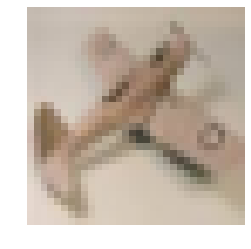

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("內容:", trans[y_train[c][0]])
plt.axis("off")
plt.imshow(x_train[c])

## 卷積

卷積: 使用 filter mask(3x3) 遍巡整張圖(64x64)的結果(62x62)(過程為矩陣相乘)

padding: 原圖若為 64x64, 在外圍加上白邊成為 66x66 的圖, 則卷積結果為 64x64

池化: 因卷積計算量大 3x3 (filter mask) * 28x28 (move) * n (filter數量), 為了降低計算量 
將卷積圖(32x32)分割為若干的局部區域(2x2) 取範圍內的卷積最大值 最終將卷積圖壓縮為(16x16) 

卷積網路範例

原始資料(32,32,3)

 => 特徵萃取(卷積: 32個過濾器) (32,32,**32**)

 => 池化(2x2壓縮) (**16,16**,32)

 => 特徵萃取(卷積: 64個過濾器) (16,16,**64**)

 => 池化(2x2壓縮) (**8,8**,64)
 
 => MLP input layer (8x8x64) 4096
 
 => hidden layer 256
 
 => output layer 10

## 三大知名卷積模型

VGG系列: 傳統卷積網路的高峰 VGG-16

ResNet(深度)系列: **層與層的捷徑**避免梯度消失的問題, 因此可以有更多的層, 深度增加

Inception(廣度)系列: **不同大小的過濾器** 有更多不同視角

## Dropout

避免 Overfitting 的方法, 隨機放棄 1/4 ~ 1/2 的神經元, 

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3),        # 32個過濾器, 過濾器大小3x3, 
               padding="same",    # padding,
               activation="relu", # 激活函數, 中間層用 relu
               input_shape=(32, 32, 3))) # 輸入格式
cnn.add(MaxPooling2D(pool_size=(2, 2))) # 池化 2x2
cnn.add(Conv2D(64, (3,3),         # 第二層卷積
              padding="same",
              activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2))) # 池化 2x2
cnn.add(Flatten()) # 將多維度資料攤開成一維陣列
cnn.add(Dense(256, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

W0816 07:28:02.145283 140247150262144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 07:28:02.186698 140247150262144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 07:28:02.193200 140247150262144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 07:28:02.227765 140247150262144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0816 07:28:02.278759 140247150262144 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
__________

第一次卷積

conv2d_1 (Conv2D)            (None, 32, 32, 32)        896  = (3x3)(size) x 3(RGB) x 32(特徵數) + bias(32)

第二次卷積

conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 =  (3x3)(size) x 32(上一層取出的特徵數) x 64(特徵數) + bias(32)

In [6]:
cnn.compile(loss="categorical_crossentropy", # 多個機率輸出
           optimizer="adam",
           metrics=["accuracy"]) # 輸出機率

W0816 07:28:02.346703 140247150262144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0816 07:28:02.381828 140247150262144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [8]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("Demo:", y_train_cat[0])

Demo: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
cnn.fit(x_train_norm,
       y_train_cat,
       batch_size=200,
       epochs=10,
       validation_split=0.1,
       verbose=2)

W0816 07:28:03.717035 140247150262144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 11s - loss: 1.5745 - acc: 0.4288 - val_loss: 1.2892 - val_acc: 0.5520
Epoch 2/10
 - 4s - loss: 1.2160 - acc: 0.5685 - val_loss: 1.1306 - val_acc: 0.6030
Epoch 3/10
 - 4s - loss: 1.0671 - acc: 0.6258 - val_loss: 1.0407 - val_acc: 0.6420
Epoch 4/10
 - 5s - loss: 0.9635 - acc: 0.6643 - val_loss: 0.9440 - val_acc: 0.6794
Epoch 5/10
 - 4s - loss: 0.8951 - acc: 0.6876 - val_loss: 0.8829 - val_acc: 0.6968
Epoch 6/10
 - 5s - loss: 0.8289 - acc: 0.7094 - val_loss: 0.8659 - val_acc: 0.6990
Epoch 7/10
 - 4s - loss: 0.7679 - acc: 0.7304 - val_loss: 0.8381 - val_acc: 0.7120
Epoch 8/10
 - 5s - loss: 0.7151 - acc: 0.7489 - val_loss: 0.8197 - val_acc: 0.7172
Epoch 9/10
 - 5s - loss: 0.6637 - acc: 0.7678 - val_loss: 0.8012 - val_acc: 0.7310
Epoch 10/10
 - 5s - loss: 0.6125 - acc: 0.7850 - val_loss: 0.7859 - val_acc: 0.7326


In [15]:
# 驗證模型
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 1s 129us/step


[0.8202615146636962, 0.718]

In [11]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre =  cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre)) # 用正式資料來驗證模型

,0,1,2,3,4,5,6,7,8,9
0,756,11,58,24,16,6,14,9,67,39
1,19,761,10,10,3,9,14,2,18,154
2,66,3,612,74,66,57,78,29,7,8
3,20,5,70,559,57,173,77,26,5,8
4,23,3,90,59,635,44,78,51,14,3
5,13,2,56,174,35,640,28,39,6,7
6,5,1,46,65,16,20,834,3,3,7
7,16,2,41,34,56,72,8,755,0,16
8,67,30,22,20,7,9,11,2,791,41
9,32,42,11,16,5,9,10,14,24,837


In [12]:
y_test.shape

(10000, 1)

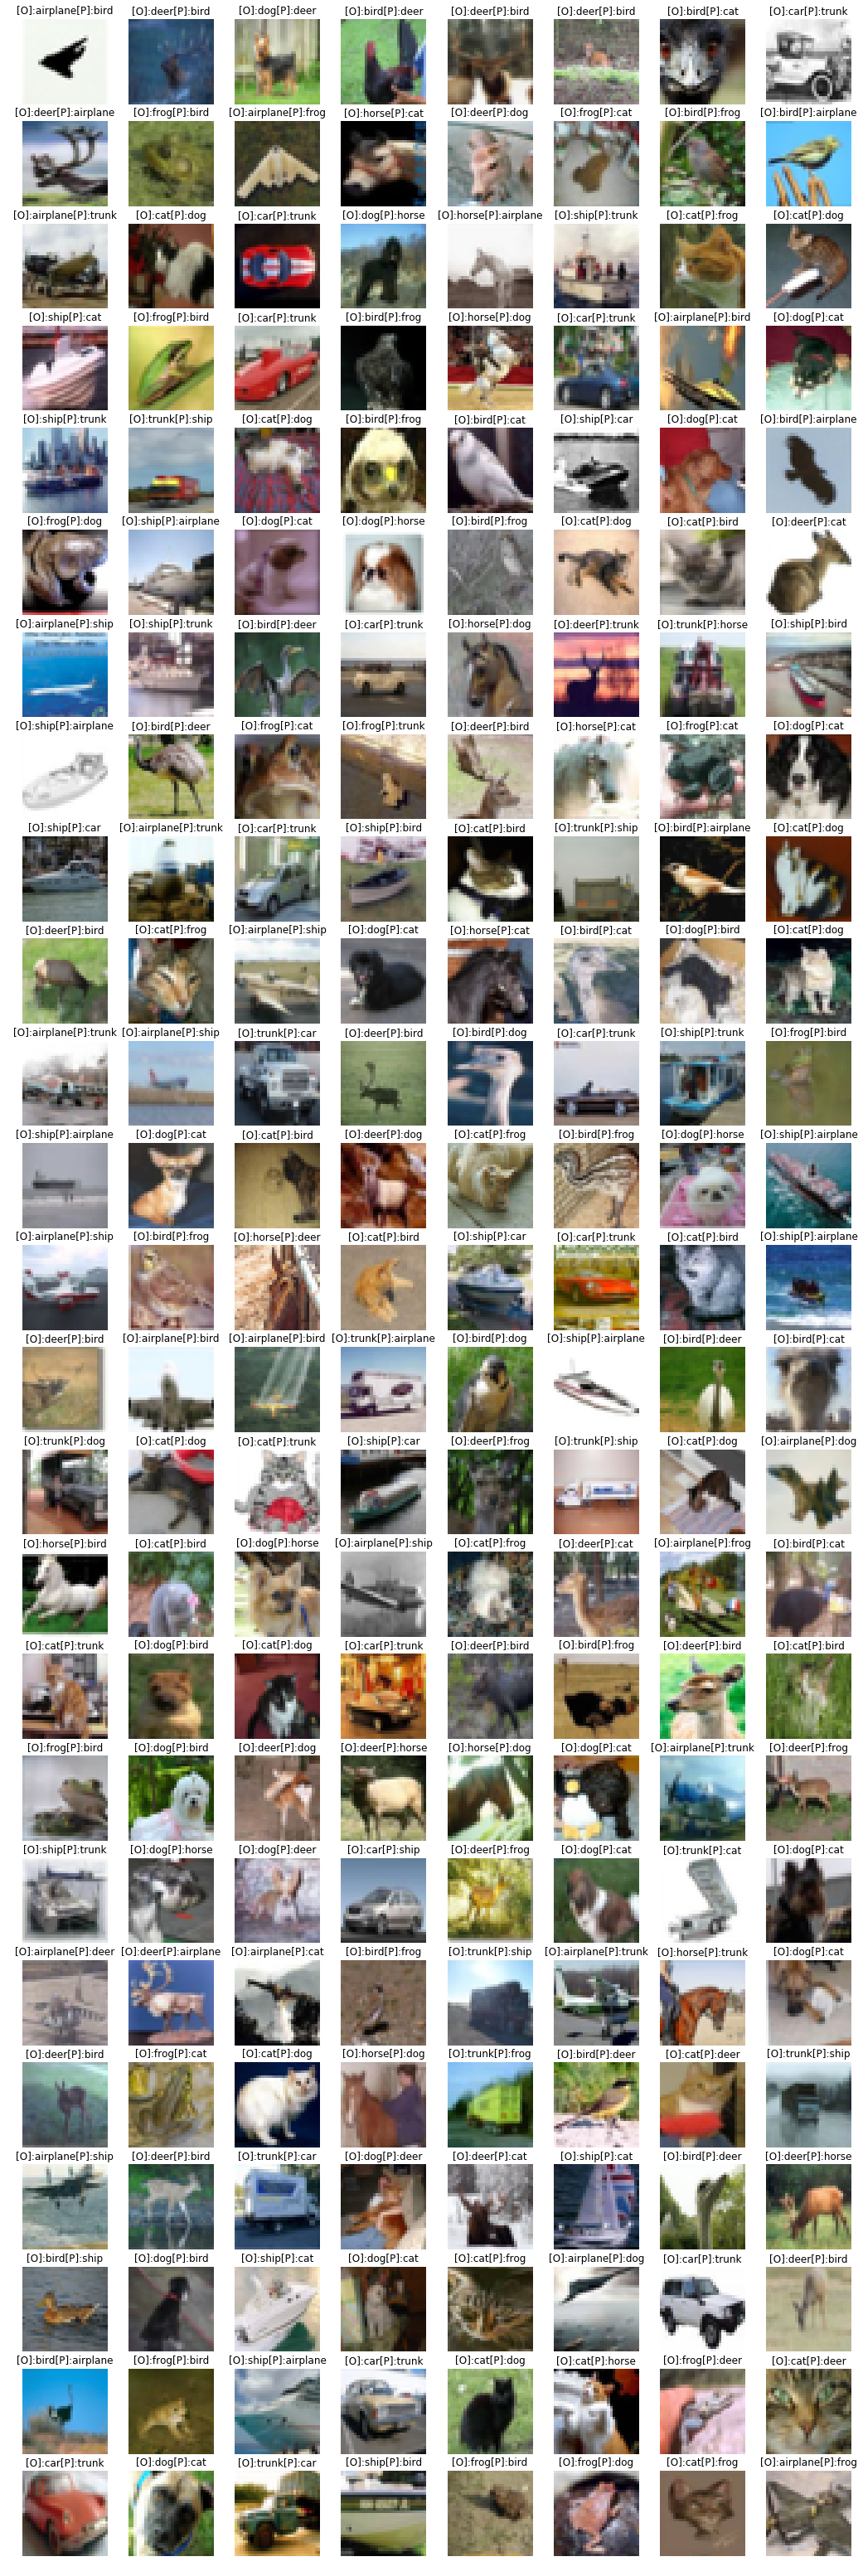

In [13]:
# 印出預測錯誤的資料
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
false_index = np.nonzero(pre != y_test.reshape(10000))[0]

false_img = x_test[false_index] # 測試圖片(預測錯誤)
ori_label = y_test[false_index] # 測試圖片答案(預測錯誤)
pre_label = pre[false_index] # 預測結果(預測錯誤)

# 用 sub plot 把多張圖合成一張
width = 8
height = int(len(false_index) / 8) + 1
plt.figure(figsize=(18,800)) # 設定顯示大小, 單位是英吋
for (index, img) in enumerate(false_img[:200]):
    plt.subplot(height, width, index+1) # index + 1 => 第 index+1 張
    msg = "[O]:" + trans[ori_label[index][0]] + "[P]:" + trans[pre_label[index]]
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img)

In [0]:
cnn.save("cnn_cifar10.h5")